In [0]:
NAME = "Daniel Martin"
COLLABORATORS = ""

---

# Lab 6a: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [0]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim
from sklearn.cluster import KMeans

File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.



In [0]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Q1 (1 point)** : Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [0]:
#Replace 0 with the code / value; Do not delete this cell
similarity_pair1 = model.similarity('France','England')
similarity_pair2 = model.similarity('smaller','bigger')
similarity_pair3 = model.similarity('England','London')
similarity_pair4 = model.similarity('France','Rocket')
similarity_pair5 = model.similarity('big','bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


**Q2 (1 point)** : Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [0]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model['France'][:5]
vector_2 = model['England'][:5]
vector_3 = model['smaller'][:5]
vector_4 = model['bigger'][:5]
vector_5 = model['rocket'][:5]
vector_6 = model['big'][:5]



In [0]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


**Q3 (1 point)**: Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [0]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = np.linalg.norm(model['France']-model['England'])
eu_dist2 = np.linalg.norm(model['smaller']-model['bigger'])
eu_dist3 = np.linalg.norm(model['England']-model['London'])
eu_dist4 = np.linalg.norm(model['France']-model['Rocket'])
eu_dist5 = np.linalg.norm(model['big']-model['bigger'])



In [0]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


**Q4 (2 points)**: What is the relationship between the magnitude of individual vectors, the vectors themselves and the cosine distance for any pair of words. Use any tuple in Q1 as an example to support your answer.

**Do not delete the below cell**

In [0]:
# ex) (France, England)
# cosine similarity cos(a,b) = a(dot product)b / sqrt(a(dot product)a) * sqrt(b(dot product)b)
# cos(France, England) = France_vec * England_vec / (sqrt(Franc_vec*France_vec))*(sqrt(England_vec*England_vec))


**Q5 (1 point)**: Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [0]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive=['King','Queen'], negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger','small'], negative=['big'])[:2]
closest3 = model.most_similar(positive=['man','programmer'], negative=['woman'])[:2]
closest4 = model.most_similar(positive=['waiting','run'], negative=['wait'])[:2]
closest5 = model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'])[:2]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


**Q6 (3 points)**: Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [0]:
from random import sample
import numpy as np

words = list(model.wv.vocab.keys())
sample = sample(words, 20000)
#sample

X = np.empty((20000, 300))
for i in range(20000):
  X[i] = model[sample[i]]

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


(20000, 300)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,9):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  print('k: {} score: {}'.format(k, score)) 


k: 2 score: 0.2153115242061107
k: 3 score: 0.1291362212919472
k: 4 score: 0.07297147856266706
k: 5 score: 0.06197115288921009
k: 6 score: 0.05694870119466965
k: 7 score: 0.04609936400448944
k: 8 score: 0.03132558666142625


In [0]:
# 2 is best K
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)

cluster_1 = model.similar_by_vector(kmeans.cluster_centers_[0])[:5]
cluster_2 = model.similar_by_vector(kmeans.cluster_centers_[1])[:5]
print(cluster_1)
print(cluster_2)

# The first cluster is a cluster of words that appears to names or authors from
# Google's news data.  This could be why those words and their semantic representation
# are clustered together.  The second cluster seems to by words that in HTML or 
# irregular .net syntax.  However, I do feel that these clusters may overlap 
# (not a clean cluster), especially since there are so many data points and the 
# best K was 2. 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Emil_Protalinski_Published', 0.9194611310958862), ('By_QianMian_####-##-##', 0.917617678642273), ('By_HuDie_####-##-##', 0.9174624681472778), ('By_XiaoBing_####-##-##', 0.9159759283065796), ('BY_GEOFF_KOHL', 0.9159120917320251)]
[('http_dol##.net_index###.html_http', 0.918448805809021), ('dol##.net_index####.html_http_dol##.net', 0.9081463813781738), ('index###.html_http_dol##.net_index###.html', 0.9070696830749512), ('Deltagen_undertakes', 0.9042704105377197), ('By_TRICIA_SCRUGGS', 0.9025315046310425)]


**Q7 (1 point)**: What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [0]:
# Skipgram model uses categorical cross-entropy loss function.
# Categorical cross-entropy is used for single label categorization, when only 
# one category is applicable for each data point. This loss function is minimizing
# the difference (error) between the true distribution class (usually one-hot encoded) 
# and the distribution of the predictions.  Minimizing the dot product, if normalized
# using softmax, of the predicted vector and the true vector.


**Bonus Question (1 point)** : Find at least 2 interesting word vec combinations like the ones given in Q5

**Do not delete the below cell**

In [0]:
inter_one = model.most_similar(positive=['Porsche','BMW'], negative=['Mercedes'])[:2]
inter_two = model.most_similar(positive=['California','New_York'], negative=['Nebraska'])[:2]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(inter_one)
print(inter_two)

[('Audi', 0.6969912052154541), ('Volkswagen', 0.6102272868156433)]
[('Los_Angeles', 0.6218940019607544), ('San_Francisco', 0.5677804946899414)]


LAB 6b)

In [92]:
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2019-11-12 03:56:03--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.4.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.4.6|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
### Download and load "Alice in Wonderland" by Alice Gerstenberg
## from Project Gutenberg : https://www.gutenberg.org
url = "http://www.gutenberg.org/files/11/11-0.txt" ## Your raw text file location 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

In [0]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [95]:
tokenized_raw[:10]

['Project Gutenberg s Alice s Adventures in Wonderland , by Lewis Carroll This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org Title : Alice s Adventures in Wonderland Author : Lewis Carroll Posting Date : June 25 , 2008 [ EBook 11 ] Release Date : March , 1994 Last Updated : October 6 , 2016 Language : English Character set encoding : UTF-8 * * * START OF THIS PROJECT GUTENBERG EBOOK ALICE S ADVENTURES IN WONDERLAND * * * ALICE S ADVENTURES IN WONDERLAND Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3 .',
 '0 CHAPTER I.',
 'Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , and what is t

In [0]:
# Remove punctuations & lowecase text
nopunct = []
for sent in tokenized_raw:
    a = [w.lower() for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

In [97]:
# Word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[0]

['project',
 'gutenberg',
 's',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever']

In [98]:
### Creating a list of unique words 
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
print(len(unique_words))

3084


1) Generate embeddings from the corpus you have chosen.

In [0]:
### Its just one single command
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)

## Window size : The parameter that fixes the length of window of words by which the model sweeps 
# the data
## Size: Size of the vector
## min_count: accept a word if it has a certain minimum number of occurances in the document

In [100]:
## Extracting the respective vectors corresponding to the words
vector_list = model[unique_words] ## n by d matrix containing words and their respective vectors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [101]:
len(vector_list)

3084

2) 3 Hypothesis of choosen corpus

In [102]:
# Hypothesis one: I think the word 'Alice' and the words 'girl/young'
# will have a high similarity (smaller angle between vectors)

print('alice/girl' , model.similarity('alice', 'girl')) # 0.9476881
print('alice/young' , model.similarity('alice', 'young')) # 0.9909074

# Hypothesis two: I think the word 'Rabbit' and the words 'timid/hurry'
# will have a high similarity (smaller angle between vectors)

print('rabbit/timid', model.similarity('rabbit', 'timid')) # 0.9076624
print('rabbit/hurry', model.similarity('rabbit', 'hurry')) # 0.9870283

# Hypothesis three: I think the word 'Queen' and the words 
# 'mean/loud' will have a high similarity (smaller angle between vectors)

print('queen/mean', model.similarity('queen', 'mean')) # 0.98348093
print('queen/loud', model.similarity('queen', 'loud')) # 0.9866151

# However, certain pairs of words that I would not expect to be similar 
# like Alice - Old have a similarity of almost 1, which does not make 
# sense.  This could possibly be the case because I am referencing/using
# a very small corpus.
print('alice/old' , model.similarity('alice', 'old')) # 0.9988168

alice/girl 0.9439648
alice/young 0.9923736
rabbit/timid 0.96509993
rabbit/hurry 0.9944021
queen/mean 0.9821536
queen/loud 0.98684436
alice/old 0.9988314


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWa

3) T-SNE dimensionality reduction

3a) Google News Corpus

In [103]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [84]:
# 20k samples
most_frequent = model.wv.index2entity[:20000]
most_frequent_vectors = model[most_frequent]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [104]:
## A popular non-linear dimensionality reduction technique that preserves greatly thge local 
## and global structure of the data. Essentially tries to reconstruct the subspace in which the 
## data exists
## We will use the Sklearn TSNE implementation 

from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(most_frequent_vectors)


## Parameters
## n_components = number of dimensions you want your data to be reduced
## preplexity =  Number of neighboours to fit the gaussian , normally 30

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.321s...
[t-SNE] Computed neighbors for 20000 samples in 355.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

4) - Google News

In [0]:
## Vizualise
%matplotlib inline
from matplotlib import pyplot as plt

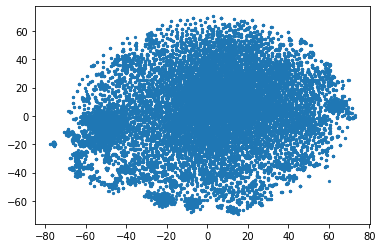

In [106]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 

This scatter plot shows that there are many words with different embeddings being used in the Google News corpus.  When we reduced the dimensions from 16 to 2, the plot shown is a very large and spread 'blob'.  If we explore a few of the words in the corpus, we see that many of the words are stop words such as 'for', 'that', and 'the'.  It would make sense that these words have a high similarity because they could be used in the same context.  This could possibly be the reason why there is no unique pattern/shape like the corpus used in Alice in Wonderland. 

3b) Alice in Wonderland Corpus

In [107]:
## A popular non-linear dimensionality reduction technique that preserves greatly thge local 
## and global structure of the data. Essentially tries to reconstruct the subspace in which the 
## data exists
## We will use the Sklearn TSNE implementation 

from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

## Parameters
## n_components = number of dimensions you want your data to be reduced
## preplexity =  Number of neighboours to fit the gaussian , normally 30 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3084 samples in 0.004s...
[t-SNE] Computed neighbors for 3084 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3084
[t-SNE] Computed conditional probabilities for sample 2000 / 3084
[t-SNE] Computed conditional probabilities for sample 3000 / 3084
[t-SNE] Computed conditional probabilities for sample 3084 / 3084
[t-SNE] Mean sigma: 0.032982
[t-SNE] Computed conditional probabilities in 0.371s
[t-SNE] Iteration 50: error = 74.9419937, gradient norm = 0.0516105 (50 iterations in 2.259s)
[t-SNE] Iteration 100: error = 68.2900620, gradient norm = 0.0088813 (50 iterations in 1.214s)
[t-SNE] Iteration 150: error = 67.9414749, gradient norm = 0.0152531 (50 iterations in 1.038s)
[t-SNE] Iteration 200: error = 67.8603439, gradient norm = 0.0040627 (50 iterations in 1.025s)
[t-SNE] Iteration 250: error = 67.7992096, gradient norm = 0.0029138 (50 iterations in 1.042s)
[t-SNE] KL divergence after 250 iterat

4 - Alice in Wonderland 

In [0]:
## Vizualise
%matplotlib inline
from matplotlib import pyplot as plt

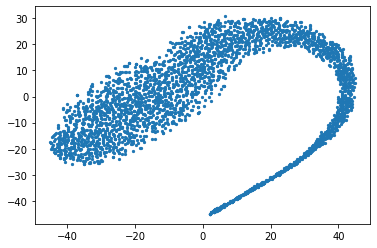

In [109]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 

This scatter plot shows that there are only a particular set of words being used in the Alice in Wonderland corpus.  Reducing the dimensions from 16 to 2, shows a scatter plot where many of the words are in a 'blob' on the left hand side, while the rest narrow together in a curved shape.  This may be the reason why certain words I would expect to have a low similarity actaully end up having a high similarity.  Another interesting fact is that the scatter plot for the book used in the tutorial had a very similar shape.  We were wondering if this could be because the vocab used in books are similar or are used in a similar context.



6) TSV format

In [0]:
import pandas as pd

df = pd.DataFrame(data_embed)
df['words'] = unique_words
df = df.rename(columns = {0: 'dim1', 1: 'dim2'})
df.to_csv('output_file.tsv', sep='\t', index=False)

In [0]:
from google.colab import files
files.download("output_file.tsv")